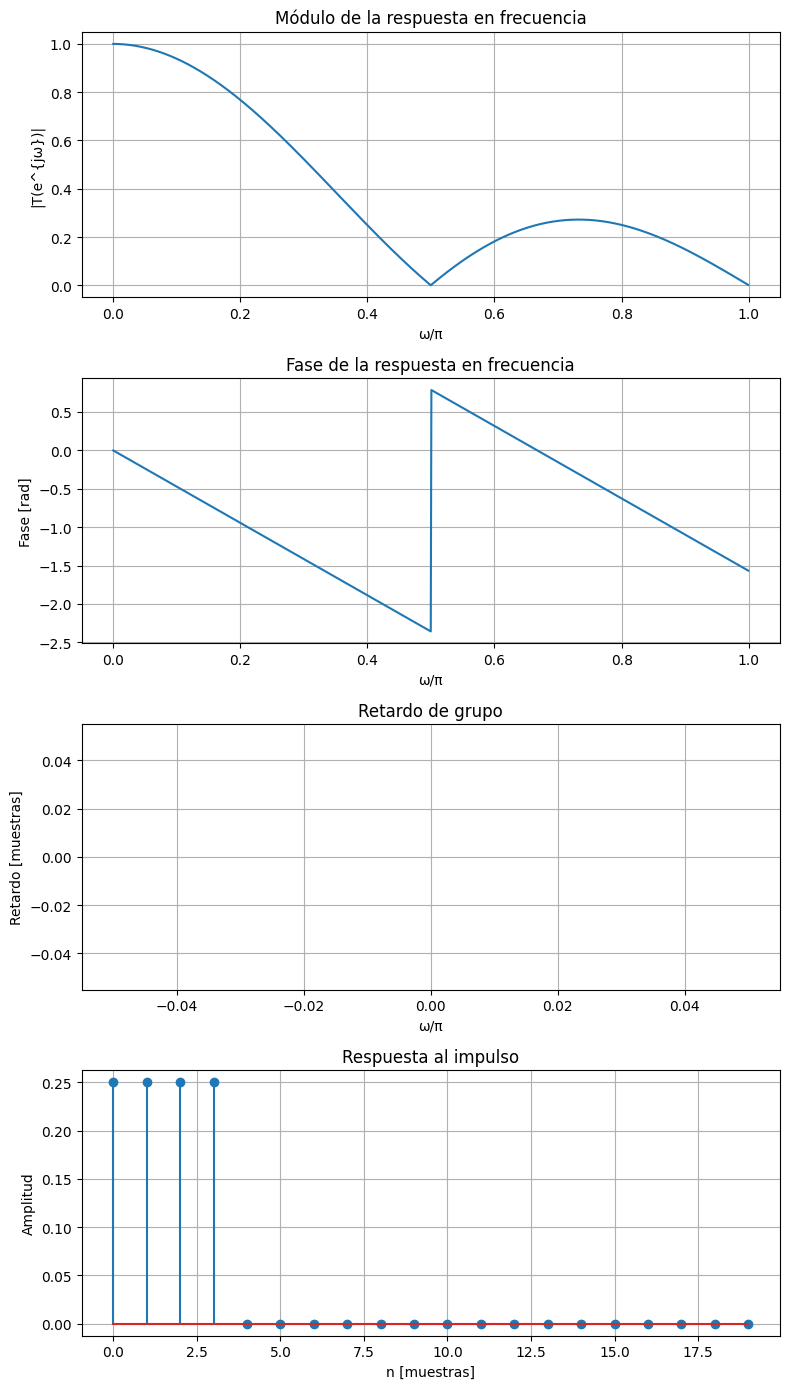

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Definir la función de transferencia T(z)
# T(z) = 1/4 * (1 - z^-4) / (1 - z^-1)
# Coeficientes del numerador y denominador
b = [1, 0, 0, 0, -1]  # 1 - z^-4
b = [coef/4 for coef in b]  # Multiplicar por 1/4

a = [1, -1, 0, 0, 0]  # 1 - z^-1

# Respuesta en frecuencia
w, h = signal.freqz(b, a, worN=1024)

# Módulo y fase
modulo = np.abs(h)
fase = np.angle(h)

# Retardo de grupo
retardo = -np.diff(np.unwrap(fase)) / np.diff(w)

# Respuesta al impulso
impulso = np.zeros(20)
impulso[0] = 1
respuesta_impulso = signal.lfilter(b, a, impulso)

# Graficar
fig, axs = plt.subplots(4, 1, figsize=(8, 14))

# Módulo
axs[0].plot(w/np.pi, modulo)
axs[0].set_title('Módulo de la respuesta en frecuencia')
axs[0].set_ylabel('|T(e^{jω})|')
axs[0].set_xlabel('ω/π')
axs[0].grid()

# Fase
axs[1].plot(w/np.pi, fase)
axs[1].set_title('Fase de la respuesta en frecuencia')
axs[1].set_ylabel('Fase [rad]')
axs[1].set_xlabel('ω/π')
axs[1].grid()

# Retardo de grupo
axs[2].plot(w[1:]/np.pi, retardo)
axs[2].set_title('Retardo de grupo')
axs[2].set_ylabel('Retardo [muestras]')
axs[2].set_xlabel('ω/π')
axs[2].grid()

# Respuesta al impulso
axs[3].stem(np.arange(len(respuesta_impulso)), respuesta_impulso)
axs[3].set_title('Respuesta al impulso')
axs[3].set_ylabel('Amplitud')
axs[3].set_xlabel('n [muestras]')
axs[3].grid()

plt.tight_layout()
plt.show()

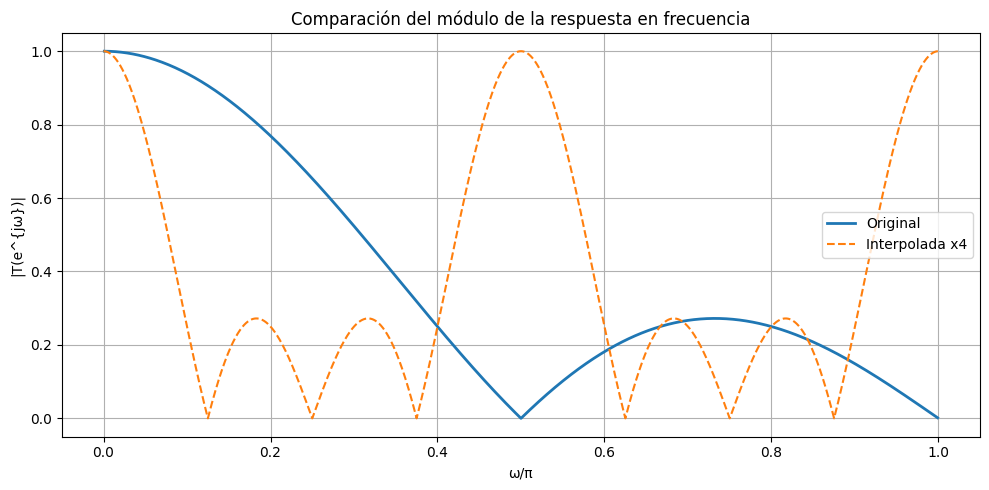

TypeError: stem() got an unexpected keyword argument 'use_line_collection'

<Figure size 800x400 with 0 Axes>

In [7]:
# Interpolación por 4 de la respuesta al impulso
from scipy.signal import upfirdn, freqz

# Interpolar la respuesta al impulso por 4 (inserta 3 ceros entre cada muestra)
respuesta_interp = upfirdn([1], respuesta_impulso, up=4)

# Calcular la respuesta en frecuencia de la original
w, h = freqz(b, a, worN=1024)
modulo = np.abs(h)

# Calcular la respuesta en frecuencia de la interpolada
w_interp, h_interp = freqz(respuesta_interp, [1], worN=4096)  # [1] porque es respuesta al impulso
modulo_interp = np.abs(h_interp)

# Graficar ambas respuestas en frecuencia (módulo)
plt.figure(figsize=(10, 5))
plt.plot(w/np.pi, modulo, label='Original', linewidth=2)
plt.plot(w_interp/np.pi, modulo_interp, label='Interpolada x4', linestyle='--')
plt.title('Comparación del módulo de la respuesta en frecuencia')
plt.xlabel('ω/π')
plt.ylabel('|T(e^{jω})|')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Graficar la respuesta al impulso interpolada
plt.figure(figsize=(8, 4))
plt.stem(np.arange(len(respuesta_interp)), respuesta_interp, use_line_collection=True)
plt.title('Respuesta al impulso interpolada por 4')
plt.xlabel('n [muestras]')
plt.ylabel('Amplitud')
plt.grid()
plt.tight_layout()
plt.show()

In [8]:
# Encontrar los ceros de la respuesta interpolada
# Los ceros son las raíces del polinomio de la respuesta al impulso interpolada
ceros_interp = np.roots(respuesta_interp)

# Convertir a frecuencia normalizada (ω/π)
angulos = np.angle(ceros_interp)  # en radianes

# Solo nos interesan los ceros que están sobre el círculo unitario
ceros_unit = ceros_interp[np.isclose(np.abs(ceros_interp), 1, atol=1e-2)]
angulos_unit = np.angle(ceros_unit)

# Ordenar y mostrar en términos de π
angulos_unit_pi = angulos_unit / np.pi
print("Ceros de la respuesta interpolada ubicados en (ω/π):")
for ang in np.sort(angulos_unit_pi):
    print(f"ω/π = {ang:.3f}")

Ceros de la respuesta interpolada ubicados en (ω/π):
ω/π = -0.875
ω/π = -0.750
ω/π = -0.625
ω/π = -0.375
ω/π = -0.250
ω/π = -0.125
ω/π = 0.125
ω/π = 0.250
ω/π = 0.375
ω/π = 0.625
ω/π = 0.750
ω/π = 0.875


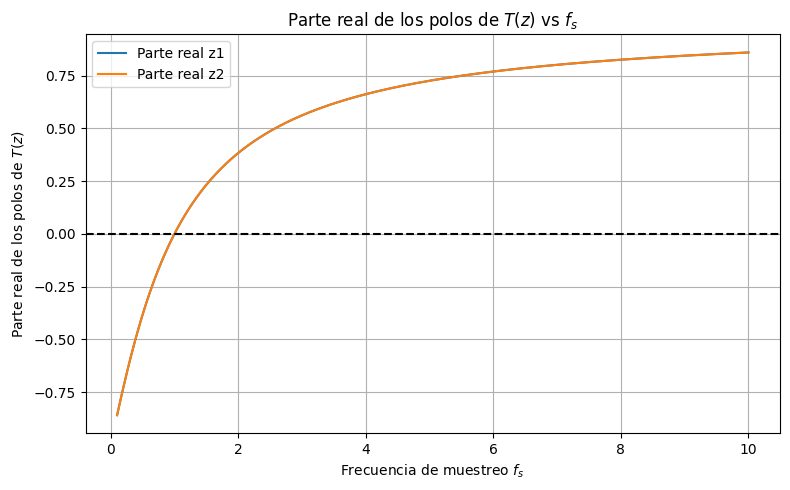

Valor mínimo de fs para que ambas partes reales sean positivas: 1.013


In [9]:
# Analizar parte real de los polos de T(z) en función de fs
import numpy as np
import matplotlib.pyplot as plt

# Polos de T(s): s^2 + s*2*sqrt(2) + 4 = 0
p1 = -np.sqrt(2) + 1j*np.sqrt(2)
p2 = -np.sqrt(2) - 1j*np.sqrt(2)

# Vector de frecuencias de muestreo
fs_vec = np.linspace(0.1, 10, 500)  # Puedes ajustar el rango

# Guardar parte real de los polos de z
real_z1 = []
real_z2 = []

for fs in fs_vec:
    # Transformación bilineal inversa: z = (2fs + s)/(2fs - s)
    z1 = (2*fs + p1)/(2*fs - p1)
    z2 = (2*fs + p2)/(2*fs - p2)
    real_z1.append(np.real(z1))
    real_z2.append(np.real(z2))

plt.figure(figsize=(8,5))
plt.plot(fs_vec, real_z1, label='Parte real z1')
plt.plot(fs_vec, real_z2, label='Parte real z2')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('Frecuencia de muestreo $f_s$')
plt.ylabel('Parte real de los polos de $T(z)$')
plt.title('Parte real de los polos de $T(z)$ vs $f_s$')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Mostrar el valor mínimo de fs para que ambas partes reales sean positivas
fs_min = fs_vec[(np.array(real_z1) > 0) & (np.array(real_z2) > 0)]
if len(fs_min) > 0:
    print(f"Valor mínimo de fs para que ambas partes reales sean positivas: {fs_min[0]:.3f}")
else:
    print("No se encontró un fs en el rango dado donde ambas partes reales sean positivas.")

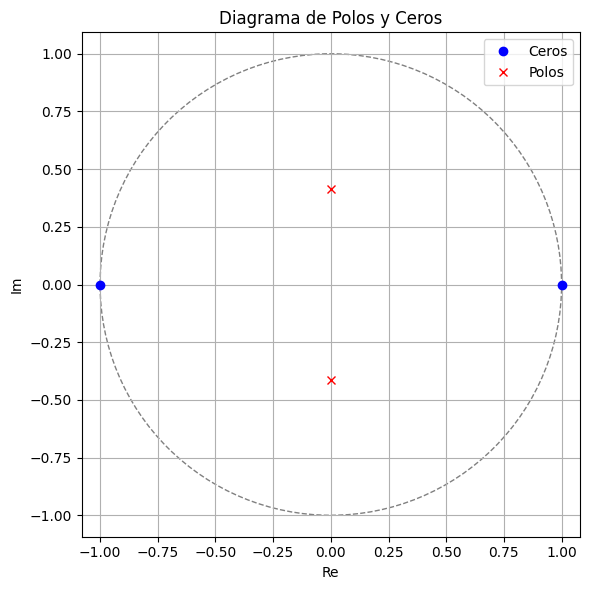

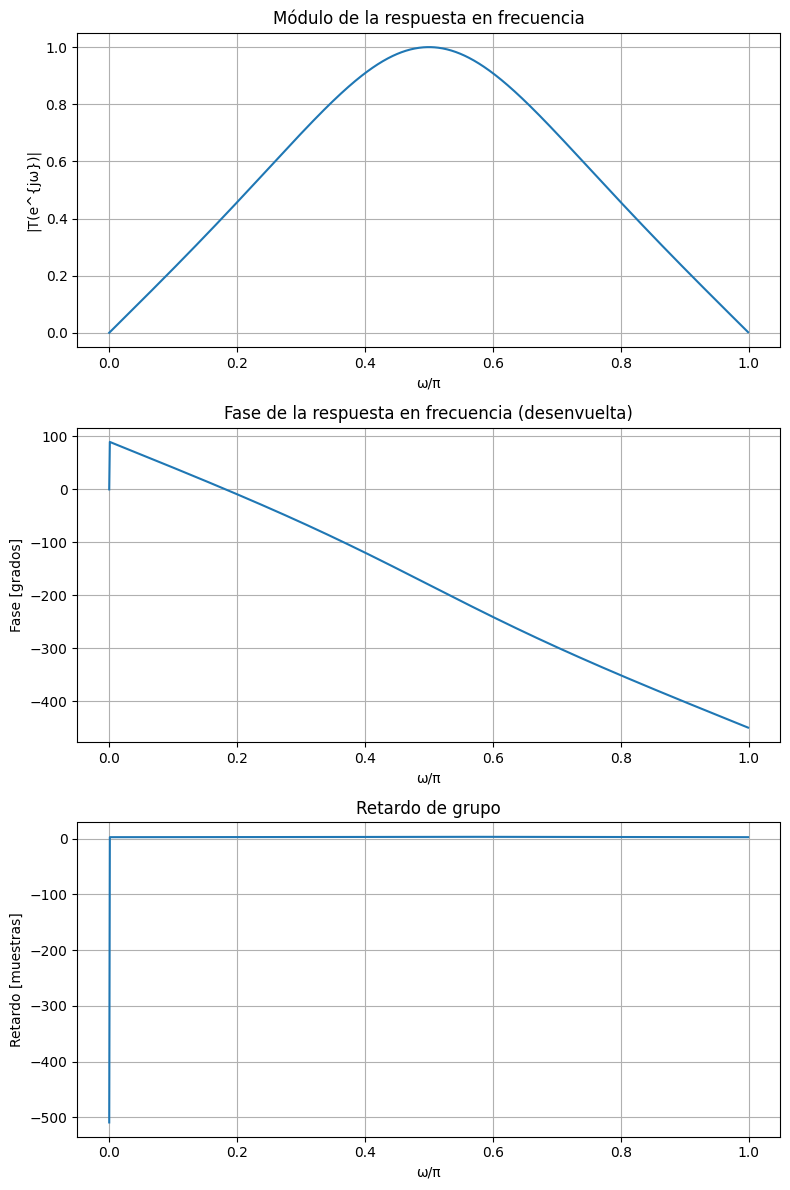

Valor máximo del módulo: 1.000
Ocurre en ω/π = 0.500
La fase cruza 0° en ω/π ≈ 0.000
La fase cruza 0° en ω/π ≈ 0.182


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Definir los coeficientes de T(z)
sqrt2 = np.sqrt(2)

# Numerador y denominador originales (sin igualar longitudes)
b = [0, 0, sqrt2, 0, -sqrt2]  # z^2 * sqrt(2) - sqrt(2)
a = [2 + sqrt2, 0, 2 - sqrt2]  # z^2 * (2+sqrt(2)) + (2-sqrt(2))

# Calcular ceros y polos con coeficientes originales
ceros = np.roots(b)
polos = np.roots(a)

# Diagrama de polos y ceros
fig_pz, ax_pz = plt.subplots(figsize=(6, 6))
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
ax_pz.add_artist(circle)
ax_pz.plot(np.real(ceros), np.imag(ceros), 'ob', label='Ceros')
ax_pz.plot(np.real(polos), np.imag(polos), 'xr', label='Polos')
ax_pz.set_xlabel('Re')
ax_pz.set_ylabel('Im')
ax_pz.set_title('Diagrama de Polos y Ceros')
ax_pz.grid()
ax_pz.axis('equal')
ax_pz.legend()
plt.tight_layout()
plt.show()

# Respuesta en frecuencia (freqz iguala internamente las longitudes solo para la respuesta)
w, h = signal.freqz(b, a, worN=1024)

# Módulo y fase
modulo = np.abs(h)
fase = np.angle(h)
fase_unwrap = np.unwrap(fase)
fase_deg = np.degrees(fase_unwrap)

# Retardo de grupo
retardo = -np.diff(fase_unwrap) / np.diff(w)
w_retardo = w[1:]/np.pi

# Graficar
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

axs[0].plot(w/np.pi, modulo)
axs[0].set_title('Módulo de la respuesta en frecuencia')
axs[0].set_ylabel('|T(e^{jω})|')
axs[0].set_xlabel('ω/π')
axs[0].grid()

axs[1].plot(w/np.pi, fase_deg)
axs[1].set_title('Fase de la respuesta en frecuencia (desenvuelta)')
axs[1].set_ylabel('Fase [grados]')
axs[1].set_xlabel('ω/π')
axs[1].grid()

# Retardo de grupo con líneas de valor medio, máximo y mínimo
mean_retardo = np.mean(retardo)
max_retardo = np.max(retardo)
min_retardo = np.min(retardo)
idx_max = np.argmax(retardo)
idx_min = np.argmin(retardo)

axs[2].plot(w_retardo, retardo, label='Retardo de grupo')
axs[2].axhline(mean_retardo, color='orange', linestyle='--', label='Valor medio')
axs[2].plot(w_retardo[idx_max], max_retardo, 'ro', label='Máximo')
axs[2].plot(w_retardo[idx_min], min_retardo, 'go', label='Mínimo')
axs[2].set_title('Retardo de grupo')
axs[2].set_ylabel('Retardo [muestras]')
axs[2].set_xlabel('ω/π')
axs[2].grid()
axs[2].legend()

plt.tight_layout()
plt.show()

# Calcular y mostrar el valor máximo del módulo y la frecuencia donde ocurre
max_modulo = np.max(modulo)
w_max = w[np.argmax(modulo)] / np.pi  # frecuencia normalizada donde ocurre el máximo
print(f"Valor máximo del módulo: {max_modulo:.3f}")
print(f"Ocurre en ω/π = {w_max:.3f}")

# Calcular y mostrar los cruces por cero de la fase desenvuelta en grados
cruces = np.where(np.diff(np.sign(fase_deg)))[0]
for idx in cruces:
    x0, x1 = w[idx]/np.pi, w[idx+1]/np.pi
    y0, y1 = fase_deg[idx], fase_deg[idx+1]
    x_cruce = x0 - y0 * (x1 - x0) / (y1 - y0)
    print(f"La fase cruza 0° en ω/π ≈ {x_cruce:.3f}")

# Mostrar valores del retardo de grupo
print(f"Retardo de grupo medio: {mean_retardo:.3f}")
print(f"Retardo de grupo máximo: {max_retardo:.3f} en ω/π = {w_retardo[idx_max]:.3f}")
print(f"Retardo de grupo mínimo: {min_retardo:.3f} en ω/π = {w_retardo[idx_min]:.3f}")


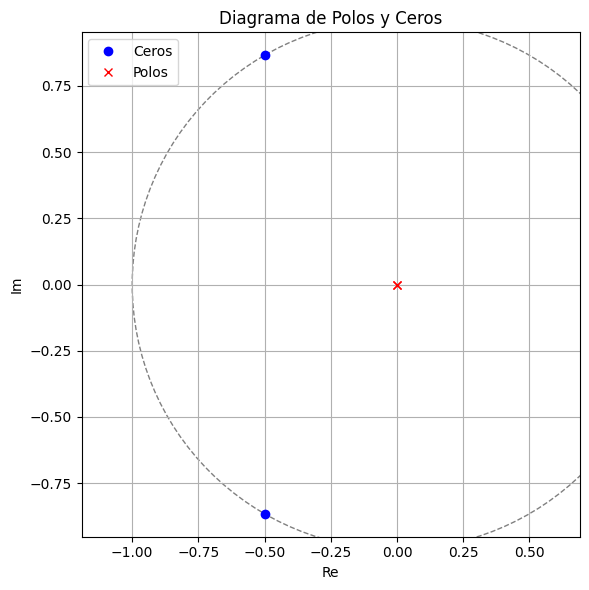

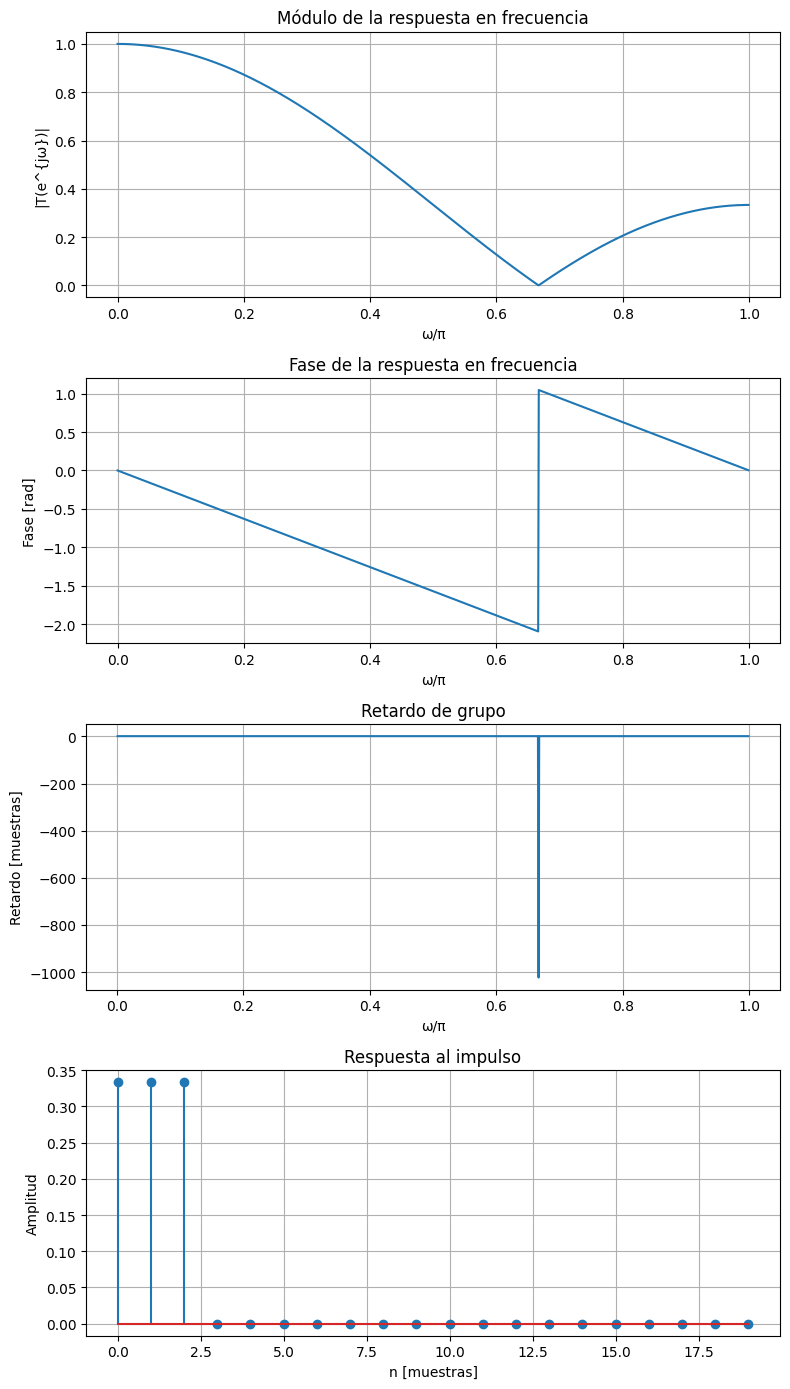

In [18]:
# Respuesta en frecuencia de T(z) = 1/3 * (1 + z^-1 + z^-2) y diagrama de polos y ceros
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Coeficientes del numerador y denominador para T(z) = 1/3 * (1 + z^-1 + z^-2)
b = [1/3, 1/3, 1/3]  # 1 + z^-1 + z^-2
a = [1, 0, 0]         # 1 + 0*z^-1 + 0*z^-2

# Diagrama de polos y ceros
ceros = np.roots(b)
polos = np.roots(a)
fig_pz, ax_pz = plt.subplots(figsize=(6, 6))
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
ax_pz.add_artist(circle)
ax_pz.plot(np.real(ceros), np.imag(ceros), 'ob', label='Ceros')
ax_pz.plot(np.real(polos), np.imag(polos), 'xr', label='Polos')
ax_pz.set_xlabel('Re')
ax_pz.set_ylabel('Im')
ax_pz.set_title('Diagrama de Polos y Ceros')
ax_pz.grid()
ax_pz.axis('equal')
ax_pz.legend()
plt.tight_layout()
plt.show()

# Respuesta en frecuencia
w, h = signal.freqz(b, a, worN=1024)

# Módulo y fase
modulo = np.abs(h)
fase = np.angle(h)

# Retardo de grupo
retardo = -np.diff(np.unwrap(fase)) / np.diff(w)

# Respuesta al impulso
impulso = np.zeros(20)
impulso[0] = 1
respuesta_impulso = signal.lfilter(b, a, impulso)

# Graficar
fig, axs = plt.subplots(4, 1, figsize=(8, 14))

# Módulo
axs[0].plot(w/np.pi, modulo)
axs[0].set_title('Módulo de la respuesta en frecuencia')
axs[0].set_ylabel('|T(e^{jω})|')
axs[0].set_xlabel('ω/π')
axs[0].grid()

# Fase
axs[1].plot(w/np.pi, fase)
axs[1].set_title('Fase de la respuesta en frecuencia')
axs[1].set_ylabel('Fase [rad]')
axs[1].set_xlabel('ω/π')
axs[1].grid()

# Retardo de grupo
axs[2].plot(w[1:]/np.pi, retardo)
axs[2].set_title('Retardo de grupo')
axs[2].set_ylabel('Retardo [muestras]')
axs[2].set_xlabel('ω/π')
axs[2].grid()

# Respuesta al impulso
axs[3].stem(np.arange(len(respuesta_impulso)), respuesta_impulso)
axs[3].set_title('Respuesta al impulso')
axs[3].set_ylabel('Amplitud')
axs[3].set_xlabel('n [muestras]')
axs[3].grid()

plt.tight_layout()
plt.show()

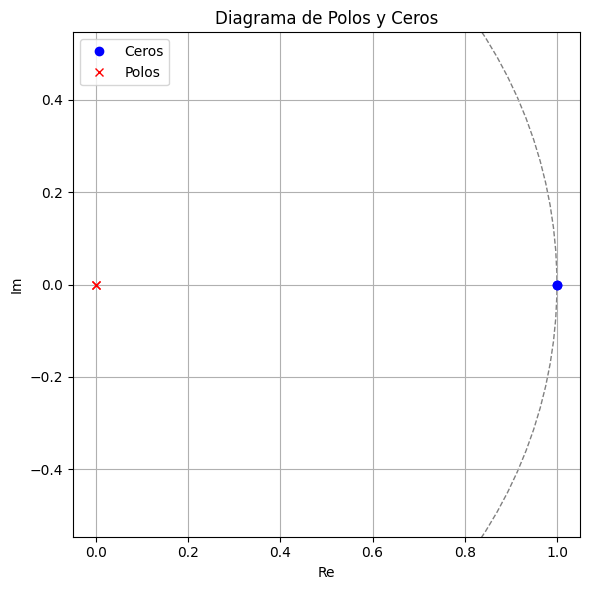

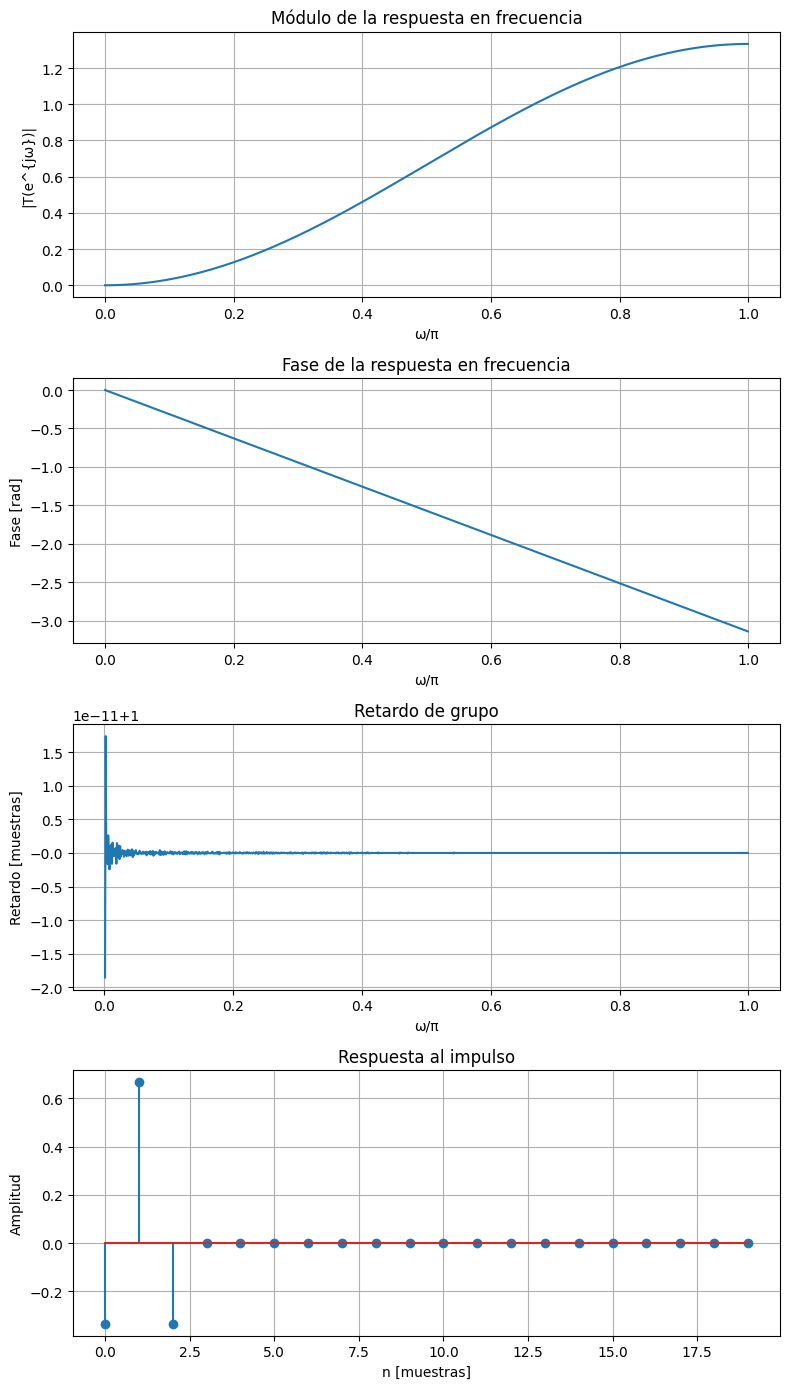

In [19]:
# Respuesta en frecuencia de T(z) = -1/3 * (1 - 2z^-1 + z^-2) y diagrama de polos y ceros
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Coeficientes del numerador y denominador para T(z) = -1/3 * (1 - 2z^-1 + z^-2)
b = [-1/3, 2/3, -1/3]  # -1 + 2z^-1 - z^-2, multiplicado por -1/3
a = [1, 0, 0]          # 1 + 0*z^-1 + 0*z^-2

# Diagrama de polos y ceros
ceros = np.roots(b)
polos = np.roots(a)
fig_pz, ax_pz = plt.subplots(figsize=(6, 6))
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
ax_pz.add_artist(circle)
ax_pz.plot(np.real(ceros), np.imag(ceros), 'ob', label='Ceros')
ax_pz.plot(np.real(polos), np.imag(polos), 'xr', label='Polos')
ax_pz.set_xlabel('Re')
ax_pz.set_ylabel('Im')
ax_pz.set_title('Diagrama de Polos y Ceros')
ax_pz.grid()
ax_pz.axis('equal')
ax_pz.legend()
plt.tight_layout()
plt.show()

# Respuesta en frecuencia
w, h = signal.freqz(b, a, worN=1024)

# Módulo y fase
modulo = np.abs(h)
fase = np.angle(h)

# Retardo de grupo
retardo = -np.diff(np.unwrap(fase)) / np.diff(w)

# Respuesta al impulso
impulso = np.zeros(20)
impulso[0] = 1
respuesta_impulso = signal.lfilter(b, a, impulso)

# Graficar
fig, axs = plt.subplots(4, 1, figsize=(8, 14))

# Módulo
axs[0].plot(w/np.pi, modulo)
axs[0].set_title('Módulo de la respuesta en frecuencia')
axs[0].set_ylabel('|T(e^{jω})|')
axs[0].set_xlabel('ω/π')
axs[0].grid()

# Fase
axs[1].plot(w/np.pi, fase)
axs[1].set_title('Fase de la respuesta en frecuencia')
axs[1].set_ylabel('Fase [rad]')
axs[1].set_xlabel('ω/π')
axs[1].grid()

# Retardo de grupo
axs[2].plot(w[1:]/np.pi, retardo)
axs[2].set_title('Retardo de grupo')
axs[2].set_ylabel('Retardo [muestras]')
axs[2].set_xlabel('ω/π')
axs[2].grid()

# Respuesta al impulso
axs[3].stem(np.arange(len(respuesta_impulso)), respuesta_impulso)
axs[3].set_title('Respuesta al impulso')
axs[3].set_ylabel('Amplitud')
axs[3].set_xlabel('n [muestras]')
axs[3].grid()

plt.tight_layout()
plt.show()

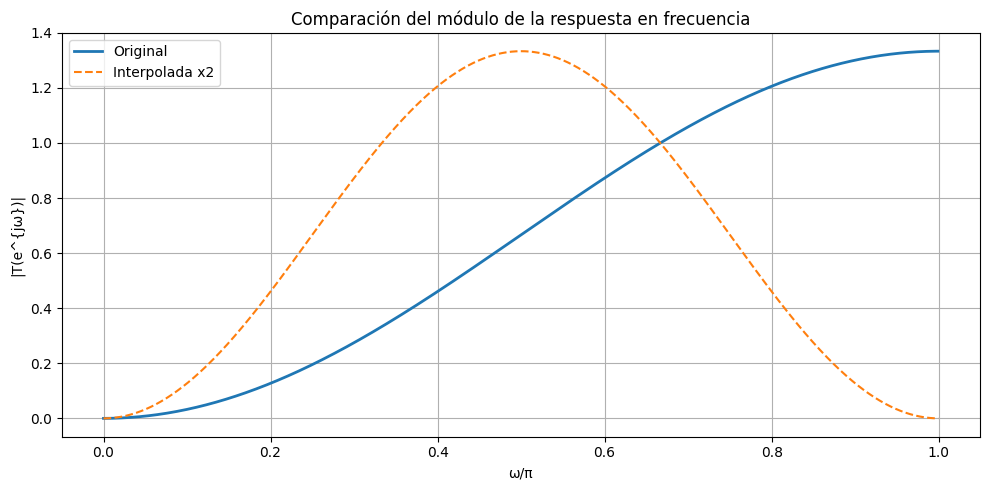

In [20]:
# Comparación del módulo de la respuesta en frecuencia original vs interpolada por 2
from scipy.signal import upfirdn, freqz

# Interpolar la respuesta al impulso por 2 (inserta 1 cero entre cada muestra)
respuesta_impulso_interp2 = upfirdn([1], respuesta_impulso, up=2)
# Respuesta en frecuencia de la original
w, h = freqz(b, a, worN=1024)
modulo = np.abs(h)
# Respuesta en frecuencia de la interpolada por 2
w_interp2, h_interp2 = freqz(respuesta_impulso_interp2, [1], worN=2048)
modulo_interp2 = np.abs(h_interp2)
# Graficar ambas respuestas en frecuencia (módulo)
plt.figure(figsize=(10, 5))
plt.plot(w/np.pi, modulo, label='Original', linewidth=2)
plt.plot(w_interp2/np.pi, modulo_interp2, label='Interpolada x2', linestyle='--')
plt.title('Comparación del módulo de la respuesta en frecuencia')
plt.xlabel('ω/π')
plt.ylabel('|T(e^{jω})|')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()